In [16]:
import numpy as np
import matplotlib.pyplot as plt

### Create function and gradient

In [17]:
def f(x, A, b):
  return 0.5 * x.transpose() @ (A @ x) - x.transpose() @ b

def grad_f(x, A, b):
  return A@x - b

### Create matrix A and ill-conditioned matrix A_ill

In [18]:
n = 2
A = np.zeros((2,2))
A[0,0] = 1
A[1,1] = 1
A = A.transpose() @ A # make sure A is symmetric and positive definite

A_ill = A.copy()
A_ill[0,0] = 10.0 # try something larger like 1000.0
A_ill[1,1] = 0.1  # try something smaller like 0.001
U = np.array([[1/np.sqrt(2), 1/np.sqrt(2)],[1/np.sqrt(2), -1/np.sqrt(2)]])
A_ill = U @ A_ill @ U.transpose()

In [19]:
A

array([[1., 0.],
       [0., 1.]])

In [20]:
A_ill

array([[5.05, 4.95],
       [4.95, 5.05]])

In [21]:
x_true = 5*np.ones(n)
b = A@x_true
b_ill = A_ill@x_true
x0 = np.array([-15, -5]) # 10*np.random.randn(n)

max_iters = int(1e4)
tol = 1e-3

print('condition number of A is', np.linalg.cond(A))
print('condition number of A_ill is', np.linalg.cond(A_ill))

condition number of A is 1.0
condition number of A_ill is 99.99999999999963


In [22]:
L = np.linalg.norm(A, ord=2)
L_ill = np.linalg.norm(A_ill, ord=2)
alpha = 1/L
alpha_ill = 1/L_ill

In [23]:
L

1.0

In [24]:
L_ill

9.999999999999996

### Create Gradient Descent Algorithm

In [25]:
def run_gradient_descent(x0, f, grad_f, A, b, tol, max_iters, alpha):

  x = x0
  f_hist = []
  grad_norm_hist = []
  x_hist = np.zeros((max_iters+1, n))
  x_hist[0,:] = x0

  for i in range(max_iters):

    grad_fk = grad_f(x, A, b) # compute gradient
    p = -grad_fk # compute update direction

    # compute exact linesearch
    # alpha = - (p.transpose() @ grad_fk ) / (p.transpose() @ (A@p) )

    # update
    x = x + alpha * p

    # evaluate function and gradient norm and append to lists
    f_val = f(x, A, b)
    grad_norm_fk = np.linalg.norm(grad_fk)
    f_hist.append(f_val)
    grad_norm_hist.append(grad_norm_fk)

    x_hist[i+1,:] = x

    # print function and grad norm at each iteration
    print('iter: %d' % (i+1), 'fx: %5.2e' % f_val, 'grad_norm: %5.2e' % np.linalg.norm(p), 'alpha: %5.2e' % alpha)

    if np.linalg.norm(p) <= tol:
      print('CONVERGED at iter:', (i+1),', with grad norm:', grad_norm_fk)
      x_hist = x_hist[0:i+1,:]
      break
  return x, f_hist, grad_norm_hist, x_hist

### Run Gradient Descent with well-conditioned $A$

In [26]:
x_sd, f_hist, grad_norm_hist, x_hist = run_gradient_descent(x0, f, grad_f, A, b, tol, max_iters, alpha)

iter: 1 fx: -2.50e+01 grad_norm: 2.24e+01 alpha: 1.00e+00
iter: 2 fx: -2.50e+01 grad_norm: 0.00e+00 alpha: 1.00e+00
CONVERGED at iter: 2 , with grad norm: 0.0


### Run Gradient Descent with ill-conditioned $A$

In [27]:
x_sd_ill, f_hist_ill, grad_norm_hist_ill, x_hist_ill = run_gradient_descent(x0, f, grad_f, A_ill, b_ill, tol, max_iters, alpha_ill)

iter: 1 fx: -2.48e+02 grad_norm: 2.12e+02 alpha: 1.00e-01
iter: 2 fx: -2.48e+02 grad_norm: 7.00e-01 alpha: 1.00e-01
iter: 3 fx: -2.48e+02 grad_norm: 6.93e-01 alpha: 1.00e-01
iter: 4 fx: -2.48e+02 grad_norm: 6.86e-01 alpha: 1.00e-01
iter: 5 fx: -2.48e+02 grad_norm: 6.79e-01 alpha: 1.00e-01
iter: 6 fx: -2.48e+02 grad_norm: 6.72e-01 alpha: 1.00e-01
iter: 7 fx: -2.48e+02 grad_norm: 6.66e-01 alpha: 1.00e-01
iter: 8 fx: -2.48e+02 grad_norm: 6.59e-01 alpha: 1.00e-01
iter: 9 fx: -2.48e+02 grad_norm: 6.52e-01 alpha: 1.00e-01
iter: 10 fx: -2.48e+02 grad_norm: 6.46e-01 alpha: 1.00e-01
iter: 11 fx: -2.48e+02 grad_norm: 6.39e-01 alpha: 1.00e-01
iter: 12 fx: -2.48e+02 grad_norm: 6.33e-01 alpha: 1.00e-01
iter: 13 fx: -2.48e+02 grad_norm: 6.27e-01 alpha: 1.00e-01
iter: 14 fx: -2.48e+02 grad_norm: 6.21e-01 alpha: 1.00e-01
iter: 15 fx: -2.48e+02 grad_norm: 6.14e-01 alpha: 1.00e-01
iter: 16 fx: -2.48e+02 grad_norm: 6.08e-01 alpha: 1.00e-01
iter: 17 fx: -2.48e+02 grad_norm: 6.02e-01 alpha: 1.00e-01
iter: 

### Plot Gradient Norms

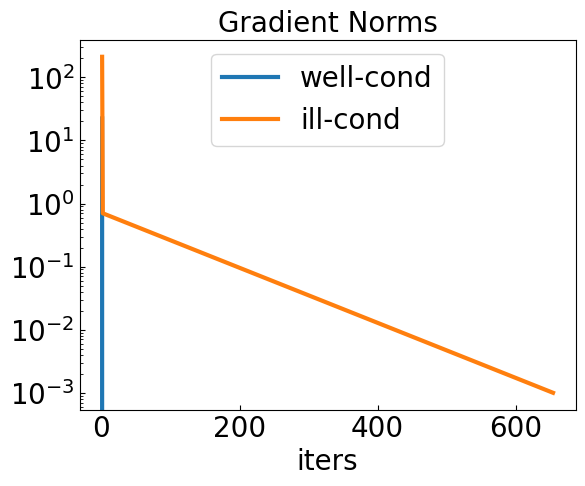

In [28]:
title_fontsize = 20
fontsize = 20

iters_array = np.linspace(1, len(grad_norm_hist), len(grad_norm_hist))
iters_array_ill = np.linspace(1, len(grad_norm_hist_ill), len(grad_norm_hist_ill))

# Plot gradient norms
fig1 = plt.figure()
ax = plt.axes()
ax.semilogy(iters_array, grad_norm_hist, linewidth=3);
ax.semilogy(iters_array_ill, grad_norm_hist_ill, linewidth=3);

ax.set_title('Gradient Norms', fontsize=title_fontsize)
ax.set_xlabel("iters", fontsize=title_fontsize)
ax.legend(['well-cond', 'ill-cond'],fontsize=fontsize, loc=9)
ax.tick_params(labelsize=fontsize, which='both', direction='in')

### Plot trajectory over contour

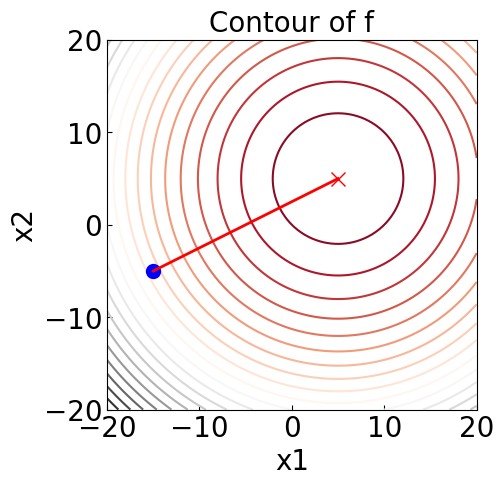

In [29]:
fig2 = plt.figure()
ax = plt.axes()
x1 = np.linspace(-20, 20, 100)
x2 = np.linspace(-20, 20, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = np.zeros(X1.shape)
for i in range(X1.shape[0]):
  for j in range(X1.shape[1]):
    x = np.array([X1[i,j], X2[i,j]])
    Z[i,j] = f(x, A, b)
ax.contour(X1, X2, Z, 20, cmap='RdGy')
ax.plot(x0[0], x0[1], 'bo', markersize=10) # plot starting point
ax.plot(x_true[0], x_true[1], 'rx', markersize=10) # plot true minimizer
ax.plot(x_hist[:,0], x_hist[:,1], 'r-', linewidth=2) # plot trajectory of algorithm
ax.set_title('Contour of f', fontsize=title_fontsize)
ax.set_xlabel("x1", fontsize=title_fontsize)
ax.set_ylabel("x2", fontsize=title_fontsize)
ax.set_aspect('equal', 'box')
ax.tick_params(labelsize=fontsize, which='both', direction='in')

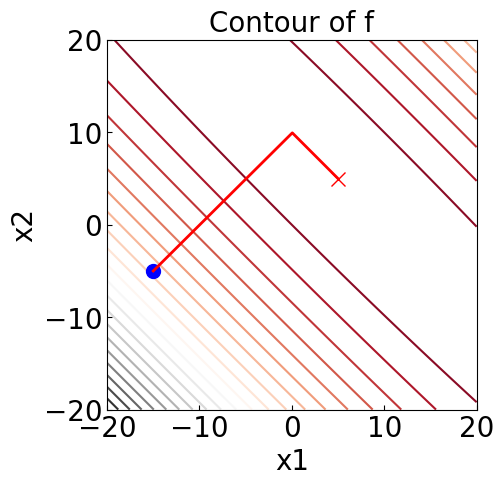

In [30]:
fig2 = plt.figure()
ax = plt.axes()
x1 = np.linspace(-20, 20, 100)
x2 = np.linspace(-20, 20, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = np.zeros(X1.shape)
for i in range(X1.shape[0]):
  for j in range(X1.shape[1]):
    x = np.array([X1[i,j], X2[i,j]])
    Z[i,j] = f(x, A_ill, b_ill)
ax.contour(X1, X2, Z, 20, cmap='RdGy')
ax.plot(x0[0], x0[1], 'bo', markersize=10) # plot starting point
ax.plot(x_true[0], x_true[1], 'rx', markersize=10) # plot true minimizer
ax.plot(x_hist_ill[:,0], x_hist_ill[:,1], 'r-', linewidth=2) # plot trajectory of algorithm
ax.set_title('Contour of f', fontsize=title_fontsize)
ax.set_xlabel("x1", fontsize=title_fontsize)
ax.set_ylabel("x2", fontsize=title_fontsize)
ax.set_aspect('equal', 'box')
ax.tick_params(labelsize=fontsize, which='both', direction='in')